<a href="https://colab.research.google.com/github/akhil1729/Python-Projects/blob/main/602_SL54772_Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


NOTE: For each of these problems, use only TensorFlow libaries for numerical manipulation.  Credit will not be given for solutions that use Numpy.

# Problem 1 - Tensors

Using only TensorFlow capabilities (that is, without importing any numpy or sklearn classes), write a function `make_blobs` that returns tensors X and y. The function signature should be:

    def make_blobs(n_samples, n_clusters, n_features=2, cluster_std=1):

where
* `n_samples` represents the number of samples to generate (positive integer)
* `n_clusters` represents the number of clusters to generate (positive integer)
* `n_features` represents the number of features to generate (positive integer)
* `cluster_std` represents the standard deviation of the clusters

Each cluster center should be generated randomly using a uniform distribution in the range $(-10, 10)$.  The function should return `(X, y)`, where `X` represents the generated samples and `y` represents the cluster membership of each sample.

Using matplotlib, show visually that the function generates clusters of Gaussian blobs, similar to the `make_blobs` function in scikit-learn.

Hints:

* To generate a random integer $x : a \le x < b$, call `tf.random.uniform(minval=a, maxval=b, dtype='int32')`.
* You may use a loop, but a vectorized implementation without loops is possible and more efficient.  If you want to attempt this problem using a vectorized implementation, you may find the function [`tf.gather`](https://www.tensorflow.org/api_docs/python/tf/gather) to be useful.

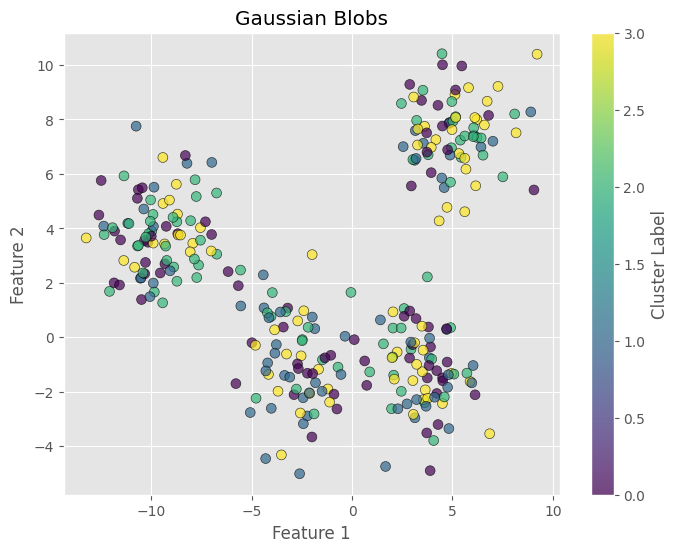

In [32]:
import matplotlib.colors as mcolors
def make_blobs(n_samples, n_clusters, n_features=2, cluster_std=1):
  # Setting a random seed for reproducibility
    tf.random.set_seed(42)

    # Generate random cluster centers in the range (-10, 10)
    centers = tf.random.uniform((n_clusters, n_features), minval=-10, maxval=10)

    # Assign each sample to a cluster and count samples per cluster
    sample_to_cluster = tf.random.uniform((n_samples,), minval=0, maxval=n_clusters, dtype=tf.int32)
    sample_count = tf.math.bincount(sample_to_cluster, minlength=n_clusters)

    # Generate samples for each cluster around the cluster centers
    samples = tf.concat([
        tf.random.normal((sample_count[i], n_features), mean=centers[i], stddev=cluster_std)
        for i in range(n_clusters)
    ], axis=0)

    # Shuffle the dataset
    indices = tf.random.shuffle(tf.range(n_samples))
    X = tf.gather(samples, indices)
    y = tf.gather(sample_to_cluster, indices)

    return X, y

# Test the make_blobs function
X, y = make_blobs(n_samples=300, n_clusters=4, n_features=2, cluster_std=1.5)

# Plotting the generated blobs
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50, alpha=0.7)
plt.title("Gaussian Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

The output shows four different clusters, each with a distinct color. The points in each cluster are centered around specific locations in the plot and follow a spread based on the given standard deviation. The color bar labels each cluster (Cluster 0, Cluster 1, etc.), helping to quickly identify which points belong to which cluster. The plot effectively shows clusters of points generated by a Gaussian distribution using TensorFlow.

# Problem 2  - Gradient descent

Given a loss function $J(\mathbf{w}) = (w_0-2)^2 + (w_1+3)^2 + (w_2 + 4)^4$,
an initial value $\mathbf{w} = [0, 0, 0]$, and a learning rate $\eta = 0.05$,
use gradient descent to find the value of $\mathbf{w}$ that approximately minimizes $J(\mathbf{w})$.  Use autodifferentiation (GradientTape) to obtain $\nabla J$. Terminate computation when $\lVert{\nabla J(\mathbf{w})}\rVert < 0.001$.

In [33]:
import tensorflow as tf
import time

# Initialize variables and hyperparameters
initial_w = [0.0, 0.0, 0.0]
learning_rate = 0.05
tolerance = 0.001
max_iterations = 50000

# Define the loss function
def loss_fn(w):
    return (w[0] - 2)**2 + (w[1] + 3)**2 + (w[2] + 4)**4

# Define gradient descent step with optional gradient clipping
def gradient_descent_step(w, learning_rate):
    with tf.GradientTape() as tape:
        loss = loss_fn(w)
    gradients = tape.gradient(loss, w)
    if tf.reduce_any(tf.math.is_nan(gradients)):
        raise ValueError("NaN values encountered in gradients.")
    gradients = tf.clip_by_norm(gradients, clip_norm=1.0)  # Clip gradients for stability
    w.assign_sub(learning_rate * gradients)
    return loss, gradients

# Initialize variables
w = tf.Variable(initial_w, dtype=tf.float32)
iteration_count = 0
start_time = time.time()

try:
    while iteration_count < max_iterations:
        # Perform a gradient descent step and calculate gradient norm
        loss, gradients = gradient_descent_step(w, learning_rate)
        grad_norm = tf.norm(gradients)

        # Log current status
        print(f"Iteration {iteration_count}: w = {w.numpy()}, Loss = {loss.numpy()}, Gradient Norm = {grad_norm.numpy()}")

        # Check stopping criterion
        if grad_norm < tolerance:
            break
        iteration_count += 1

except ValueError as e:
    print(e)

end_time = time.time()

# Final results and analysis
print(f"\nApproximate minimum found at w = {w.numpy()}")
print(f"Final Gradient Norm = {grad_norm.numpy()}")
print(f"Total Iterations = {iteration_count}")
print(f"Runtime = {end_time - start_time:.4f} seconds")

# Final checks
expected_w = tf.constant([2.0, -3.0, -4.0], dtype=tf.float32)
difference = tf.abs(w - expected_w)
if tf.reduce_all(difference < 0.1):
    print("w values are close to expected values [2, -3, -4].")
else:
    print("w values are not close to the expected values.")

Iteration 0: w = [ 0.00078094 -0.00117141 -0.04998018], Loss = 269.0, Gradient Norm = 1.0
Iteration 1: w = [ 0.00159156 -0.00238734 -0.09995882], Loss = 256.4327392578125, Gradient Norm = 1.0
Iteration 2: w = [ 0.00243337 -0.00365006 -0.14993578], Loss = 244.3331756591797, Gradient Norm = 1.0
Iteration 3: w = [ 0.003308   -0.004962   -0.19991091], Loss = 232.68955993652344, Gradient Norm = 1.0
Iteration 4: w = [ 0.00421715 -0.00632573 -0.24988404], Loss = 221.4901885986328, Gradient Norm = 1.0
Iteration 5: w = [ 0.00516266 -0.00774399 -0.29985496], Loss = 210.7235870361328, Gradient Norm = 1.0
Iteration 6: w = [ 0.00614649 -0.00921973 -0.3498235 ], Loss = 200.37844848632812, Gradient Norm = 1.0000001192092896
Iteration 7: w = [ 0.00717071 -0.01075607 -0.3997894 ], Loss = 190.44357299804688, Gradient Norm = 1.0
Iteration 8: w = [ 0.00823756 -0.01235635 -0.4497524 ], Loss = 180.90786743164062, Gradient Norm = 0.9999999403953552
Iteration 9: w = [ 0.00934943 -0.01402415 -0.4997122 ], Loss

# Problem 3 - Neural network training

We return to the MNIST dataset.  The template provides code to load a neural network model that has been built and compiled but not yet trained.  The code also [loads](https://keras.io/api/datasets/mnist/) the MNIST dataset using the Keras built-in dataset.

In [34]:
import tensorflow as tf
import keras
from keras.datasets import mnist

In [35]:
# Important - These variables are not scaled and must be normalized from [0, 256] to [0, 1]

((X_train, y_train), (X_test, y_test)) = mnist.load_data(
    path='mnist.npz'
)

# Load the model from Google Drive.  The warning can be safely disregarded; it occurs because the model
# has not been fit.
model = keras.models.load_model('/content/gdrive/Shareddrives/DS602-F22/Data/hw11-model.keras')

a. Describe the neural network.  How many hidden layers does it include, and how many neurons are in each hidden layer?  What is the total number of parameters that the model needs train?

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Points to be observed from the above symmary

1. There are three hidden layers, each being a Dense fully connected layer.
2. The first hidden layer has 256 neurons.
3. The second hidden layer has 256 neurons.
4. The third hidden layer also has 256 neurons.
5. The total number of trainable parameters in the model is 335,114.
6. Flatten Layer: 0 parameters (it only reshapes the input).
7. First Dense Layer (256 neurons): 200,960 parameters.
8. Second Dense Layer (256 neurons): 65,792 parameters.
9. Third Dense Layer (256 neurons): 65,792 parameters.
10. Output Layer (10 neurons): 2,570 parameters.

The total number of parameters that the model needs to train is 335,114.

b. The first hidden Dense layer requires training of 200,960 weights (including bias terms).  Given the architecture of this network, why do we have this number of weights?

*The first hidden Dense layer has 200,960 weights because it is fully connected to the previous layer, which is the Flatten layer with 784 input units. In a Dense layer, each neuron in the layer is connected to every neuron in the previous layer, and each connection requires a unique weight.*

There are 784 input units and 256 neurons in the first Dense layer. Each input unit connects to each of the 256 neurons, resulting in
784 * 256=200,704 weights.

In addition to the weights, each of the 256 neurons in the Dense layer has a bias term, which adjusts the activation threshold of the neuron. This adds 256 more parameters.

*so total parameters is 200704+256 = 200960*

*This structure allows the Dense layer to learn a unique weight for each input-neuron connection and a bias for each neuron, giving it the flexibility to model complex relationships in the data.*

c. Train the model using the MNIST training data by calling `model.fit`.  Set the `validation_split` parameter to 0.1 to set aside 10% of the observations for validation.  Train until 20 epochs are completed or until validation accuracy does not improve for 5 consecutive epochs, whichever occurs first.  Save the return value of `model.fit` to a variable since it will be needed for part (d).

In [37]:
from keras.datasets import mnist
from keras.callbacks import EarlyStopping

# Load and normalize the MNIST dataset
((X_train, y_train), (X_test, y_test)) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to include a single channel dimension (28x28 images to 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Load the prebuilt model
model = keras.models.load_model('/content/gdrive/Shareddrives/DS602-F22/Data/hw11-model.keras')

# Compile the model if it wasn't already compiled
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1193 - loss: 2.5869 - val_accuracy: 0.1082 - val_loss: 2.2995
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1068 - loss: 2.3061 - val_accuracy: 0.1120 - val_loss: 2.2999
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1126 - loss: 2.2987 - val_accuracy: 0.1120 - val_loss: 2.2999
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.1126 - loss: 2.2986 - val_accuracy: 0.1133 - val_loss: 2.2987
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.1018 - loss: 2.3025 - val_accuracy: 0.0978 - val_loss: 2.3026
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0992 - loss: 2.3026 - val_accuracy: 0.0978 - val_loss: 2.3026
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.0992 - loss: 2.3026 - val_accuracy: 0.0978 - val_loss: 2.3026
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0992 - loss: 2

d. Plot the training history (return value of `model.fit`), showing (1) the training/validation loss and (2) the training/validation accuracy.  Would the model benefit from additional training epochs?  Would it benefit from regularization?

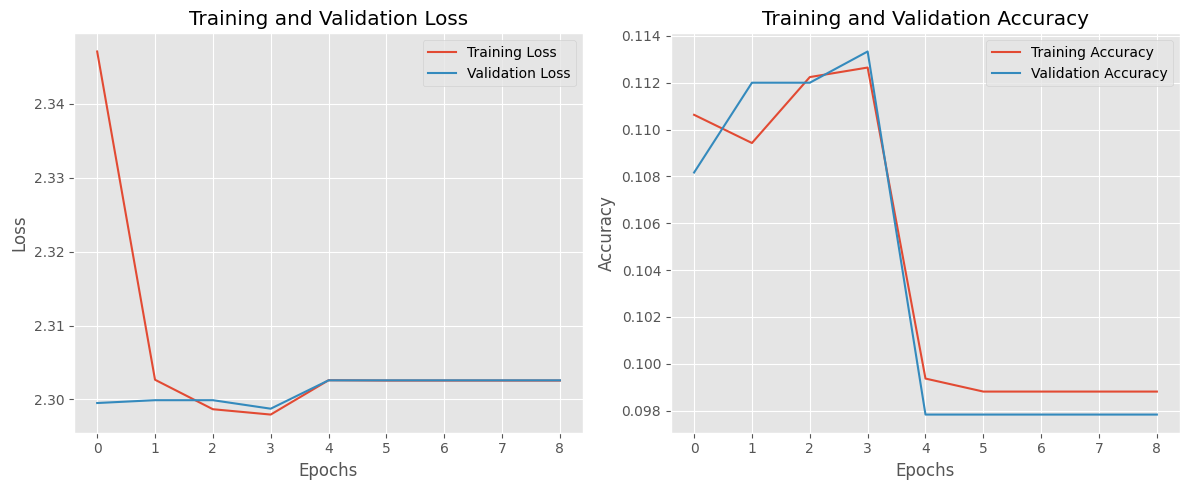

In [38]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

e. Evaluate the fit model against the test data.  Is test accuracy comparable to the validation accuracy?

In [39]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Retrieve the best validation accuracy and loss achieved during training
best_val_accuracy = max(history.history['val_accuracy'])
best_val_loss = min(history.history['val_loss'])
print(f"Best Validation Loss: {best_val_loss:.4f}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1088 - loss: 2.3004
Test Loss: 2.2998
Test Accuracy: 0.1124
Best Validation Loss: 2.2987
Best Validation Accuracy: 0.1133


Where the test accuracy is very close to validation accuracy, say, by about 0.1%. That will hint that the model performed pretty similarly on the test data as it did on the validation data, which again means the model generalized well between the two datasets.

Also, both the accuracies of the tests and the validation are very low-11.24%-which might indicate that this model has failed to learn meaningful patterns from the data. It probably requires more tuning with regard to the architecture of the model, the number of epochs during training, or the application of regularization techniques.